In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [1]:
batch_size = 8
img_height = 197
img_width = 204

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "dataset-alphabet",
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NameError: name 'tf' is not defined

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "dataset-alphabet",
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3199 files belonging to 32 classes.
Using 639 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['1-alef', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '2-b', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '3-p', '30-v', '31-he', '32-ye', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh']


In [ ]:
len(class_names)

32

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 197, 204, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 204, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 102, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 102, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 51, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 51, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2023-05-07 10:50:58.947092: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-07 10:50:58.948372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/320 [============================>.] - ETA: 0s - loss: 1.7046 - accuracy: 0.5067

2023-05-07 10:51:08.337167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


320/320 [==============================] - 11s 23ms/step - loss: 1.6979 - accuracy: 0.5086 - val_loss: 0.7438 - val_accuracy: 0.7480
Epoch 2/10
320/320 [==============================] - 7s 23ms/step - loss: 0.4154 - accuracy: 0.8648 - val_loss: 0.4327 - val_accuracy: 0.8576
Epoch 3/10
320/320 [==============================] - 7s 22ms/step - loss: 0.2148 - accuracy: 0.9301 - val_loss: 0.3953 - val_accuracy: 0.8717
Epoch 4/10
320/320 [==============================] - 7s 23ms/step - loss: 0.1095 - accuracy: 0.9664 - val_loss: 0.3135 - val_accuracy: 0.9077
Epoch 5/10
320/320 [==============================] - 7s 22ms/step - loss: 0.0691 - accuracy: 0.9762 - val_loss: 0.2454 - val_accuracy: 0.9374
Epoch 6/10
320/320 [==============================] - 7s 22ms/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.2471 - val_accuracy: 0.9452
Epoch 7/10
320/320 [==============================] - 7s 22ms/step - loss: 0.0291 - accuracy: 0.9922 - val_loss: 0.2038 - val_accuracy: 0.9468
Epoch 8/1

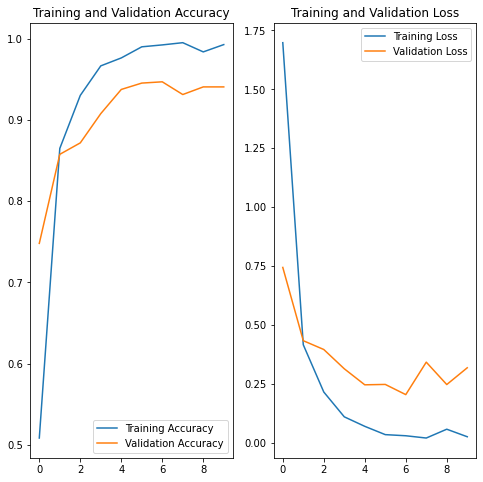

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def recognize_image(path):
    img = tf.keras.utils.load_img(
        path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [ ]:
recognize_image("dataset-alphabet/1-alef/2alef.jpg")

2023-05-07 10:52:52.123796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


This image most likely belongs to 1-alef with a 100.00 percent confidence.


In [ ]:
# save model to file
model.save("model-alphabet.h5")

In [ ]:
history.history['val_accuracy']

[0.7480438351631165,
 0.8575899600982666,
 0.8716744780540466,
 0.9076682329177856,
 0.9374021887779236,
 0.9452269077301025,
 0.9467918276786804,
 0.9311423897743225,
 0.9405320882797241,
 0.9405320882797241]